In [18]:
from hypersurface import *
import sympy as sp
from pprint import pprint
from scipy.optimize import minimize
from sympy.utilities.iterables import flatten
import math

In [19]:
z0, z1, z2, z3, z4= sp.symbols('z0, z1, z2, z3, z4')
Z = [z0,z1,z2,z3,z4]
f = z0**5 + z1**5 + z2**5 + z3**5 + z4**5
HS = Hypersurface(Z, f, 100)

In [20]:
HS.set_k(3)
ns = HS.n_sections

In [21]:
# holomorphic=True by default
factor = (HS.integrate(lambda patch, point: patch.omega_omegabar(point), numerical=True) / \
          HS.integrate(lambda patch, point: patch.num_FS_volume_form('identity', point), numerical=True)).real

The factor can be a build-in attribute and calculated patchwise. Design a function HS.calculate_factor() and call it before num_eta()

In [22]:
def flat_to_matrix(g_flat):
    g_real = g_flat[:len(g_flat)//2].reshape(ns, ns)
    g_imag = g_flat[len(g_flat)//2:].reshape(ns, ns)
    g_matrix = g_real + 1j * g_imag
    return g_matrix

In [23]:
def integration(g_flat):    
    g = flat_to_matrix(g_flat)
    h = g*np.conj(g.transpose())
    integration = HS.integrate(lambda patch, point, h_matrix=h: 
                                np.absolute(patch.num_eta(h_matrix, point)*factor - 1).real, 
                                holomorphic=True, numerical=True)
    integration = integration.real
    print(integration)
    return integration

The first matrix is the real part and second is the imaginary part.

In [44]:
#g0 = np.concatenate((np.ones(ns**2), np.ones(ns**2)),axis=None)*math.sqrt(1/2)
g0 = np.concatenate((np.identity(ns), np.identity(ns)), axis=None)*math.sqrt(1/2)
noise_real = np.tril((2 * np.random.rand(ns,ns) - 1) - 1)
noise_imag = np.tril((2 * np.random.rand(ns,ns) - 1) - 1)
noise = np.concatenate((noise_real, noise_imag), axis=None)*0.2
g0 = g0 + noise

In [45]:
res = minimize(integration, g0, method='L-BFGS-B',
               options={'iprint':1, 'ftol': 2.220446049250313e-05, 'eps': 1e-03, 'maxiter':10})

0.2907612979081771
0.2906752412162254
0.2907539939597547
0.29077127364990024
0.29076275896654635
0.29076246659647587
0.2907598091952829
0.29076109640829045
0.29076270681173266
0.2907573017701111
0.29075957098240224
0.29075959995301637
0.29076394270265776
0.2907617016971704
0.29075481336242065
0.29076394222804025
0.29077776860473176
0.29074971269946903
0.290773299385623
0.2907643083801959
0.29075790978015653
0.2907615599999559
0.29075887992841837
0.2907616636418158
0.2907611016686657
0.29076125265053904
0.29076551375585696
0.29075435078668804
0.2907558489650443
0.29075262452614564
0.29075239322597185
0.29076122969266416
0.2907827149481964
0.2907730197428634
0.2907721544568076
0.29076818923480713
0.2907612979081771
0.29074624420581247
0.29075841296867666
0.2907598266434909
0.2907630944751152
0.29076314370107376
0.290769494846193
0.2907647422240715
0.29076235239481296
0.2907573038084696
0.2907586938736661
0.29076397193324743
0.2907600306829724
0.2907535718088605
0.2907600480498407
0.29076

0.2907612979081771
0.2907612979081771
0.2907612979081771
0.2907612979081771
0.2907612979081771
0.2907612979081771
0.2907612979081771
0.2907612979081771
0.2907590994681706
0.29075967412688847
0.2907637529072334
0.29076059656330094
0.2907633085295817
0.2907591278018845
0.2907470612714535
0.2907677270496622
0.2907593335244204
0.29076098616752444
0.290756873891692
0.29076216430245183
0.29074524746802693
0.2907703697490456
0.29076686021386405
0.29076461376050344
0.29076098985112725
0.2907593545061033
0.2907666591878725
0.29076022709732186
0.2907592403565878
0.29076356091486333
0.2907608570075181
0.2907612979081771
0.2907612979081771
0.2907612979081771
0.2907612979081771
0.2907612979081771
0.2907612979081771
0.2907612979081771
0.2907612979081771
0.2907612979081771
0.2907612979081771
0.2907612979081771
0.2907612979081771
0.2907612979081771
0.2907895883863656
0.29076093652636104
0.29075927125496515
0.2907607246175679
0.29075816593551695
0.2907617458826
0.2907634589287049
0.29076242821101694
0.

0.2907612979081771
0.2907612979081771
0.2907612979081771
0.2907612979081771
0.2907612979081771
0.2907612979081771
0.2907612979081771
0.2907612979081771
0.2907612979081771
0.2907612979081771
0.2907612979081771
0.2907612979081771
0.2907612979081771
0.29074197269896407
0.29075868321274273
0.2907593197301873
0.29076002946973484
0.2907646573219608
0.2907586609954186
0.2907569647066159
0.29075245494453517
0.29075975361899775
0.29075775818388006
0.2907608181640899
0.2907612979081771
0.2907612979081771
0.2907612979081771
0.2907612979081771
0.2907612979081771
0.2907612979081771
0.2907612979081771
0.2907612979081771
0.2907612979081771
0.2907612979081771
0.2907612979081771
0.2907612979081771
0.2907612979081771
0.2907612979081771
0.2907612979081771
0.2907612979081771
0.2907612979081771
0.2907612979081771
0.2907612979081771
0.2907612979081771
0.2907612979081771
0.2907612979081771
0.2907612979081771
0.2907612979081771
0.2907612979081771
0.2907343671070235
0.29077211210959447
0.2907618975643164
0.290

0.2907601239012161
0.29076063351675707
0.29075924999099273
0.29076221779031747
0.29075413554707746
0.29076790992708323
0.29076780394633417
0.2907613405710552
0.2907779186706781
0.29076665050975675
0.290773548804732
0.29076147814894115
0.29075356015056963
0.29075709331833327
0.29076215219953505
0.2907612979081771
0.2907612979081771
0.2907440441099463
0.2907580725462473
0.2907582741606924
0.29076377623803623
0.29076431729473223
0.2907537265979394
0.29075879122139947
0.29077232876660847
0.29076045014496743
0.2907623539567861
0.29076498334475254
0.2907638877298936
0.2907615973386351
0.29076256641060966
0.2907631586066944
0.290760071869012
0.29076057902735736
0.2907601442839828
0.2907604523409062
0.29076764255077964
0.29076729896071507
0.29076736555222427
0.29076342991942344
0.290762412291908
0.2907606007514376
0.29075953134428245
0.29075776968313244
0.29076130561102825
0.29076317650536865
0.290762177018799
0.290760665436212
0.29076482618432214
0.2907594392953858
0.2907612979081771
0.290761

0.2907646115862772
0.29076402375633953
0.2907610487909055
0.2907601059565815
0.290762025318077
0.29076894930040537
0.2907566610881628
0.2907582934388935
0.29075716765532433
0.2907612979081771
0.2907612979081771
0.2907612979081771
0.2907612979081771
0.2907612979081771
0.2907612979081771
0.2907612979081771
0.2907612979081771
0.2907612979081771
0.2907612979081771
0.2907612979081771
0.2907612979081771
0.2907612979081771
0.2907612979081771
0.29074476694341084
0.29076464577339695
0.29076294585520507
0.2907609057276543
0.29076027777355035
0.29076153613646616
0.2907495462458547
0.29076064548232444
0.290766155625892
0.2907662658954469
0.2907524537243185
0.29076322359789186
0.29075935557008803
0.2907581632050078
0.29075974309002467
0.29075853067122504
0.2907605664385751
0.2907589731373455
0.2907602166166536
0.2907575762177506
0.29075108855820786
0.2907612979081771
0.2907612979081771
0.2907612979081771
0.2907612979081771
0.2907612979081771
0.2907612979081771
0.2907612979081771
0.2907612979081771


0.2907612979081771
0.2907612979081771
0.2907612979081771
0.2907612979081771
0.2907612979081771
0.2907612979081771
0.2907612979081771
0.2907612979081771
0.2907612979081771
0.2907612979081771
0.2907612979081771
0.2907612979081771
0.2907612979081771
0.2907612979081771
0.2907612979081771
0.2907612979081771
0.2907612979081771
0.2907612979081771
0.2907612979081771
0.2907612979081771
0.2907612979081771
0.2907612979081771
0.2907612979081771
0.2907612979081771
0.2907612979081771
0.2907612979081771
0.29075153819104166
0.2907633663082169
0.2907654663294795
0.2907607508140414
0.2907612319773251
0.290764605866485
0.29076379645488504
0.2907618862015691
0.29075327161776143
0.2907612979081771
0.2907612979081771
0.2907612979081771
0.2907612979081771
0.2907612979081771
0.2907612979081771
0.2907612979081771
0.2907612979081771
0.2907612979081771
0.2907612979081771
0.2907612979081771
0.2907612979081771
0.2907612979081771
0.2907612979081771
0.2907612979081771
0.2907612979081771
0.2907612979081771
0.29076129

0.24093597722656143
0.24094139518462618
0.2409464137248462
0.24094182043091988
0.24094771535270282
0.24094110259926807
0.24093860842704087
0.24094080775859705
0.24093705940850538
0.24094051798659002
0.2409428053702694
0.24094611853762984
0.2409384766564761
0.2409386756927637
0.2409383907756627
0.24094159974912013
0.2409413466776808
0.24094678109387707
0.24093990621581027
0.24094608342533472
0.24094724633595369
0.2409386003556539
0.24093876137446585
0.24094307695980885
0.24094372463413172
0.24094166900066336
0.24093778045743694
0.24094100383629996
0.24094165963576333
0.24094170540629054
0.2409415797126446
0.24094134236657208
0.2409666040954558
0.2409433809345326
0.2409400062190634
0.24094267988213952
0.24094102151068764
0.24093969126594517
0.240940430804515
0.24094395924944106
0.2409383886738077
0.24094308254182364
0.24094063059785986
0.24093564256275293
0.24094844887211928
0.24094117655903874
0.2409434030424205
0.24094132123825038
0.24094358070043845
0.2409427688387093
0.24094404859424

0.24094121725931517
0.2409414051875326
0.2409418612176796
0.24094188186471155
0.24094100605822696
0.2409412981732491
0.24094181457535324
0.24094124683878734
0.24094183451250992
0.24094188863924873
0.24094166462114572
0.24092712729062926
0.24094018828914635
0.2409427172838394
0.2409383145208188
0.24094244694317396
0.24094816024000715
0.2409420164110878
0.24093717254291477
0.24094148825544925
0.24094746718344523
0.24094258551772343
0.24094679111445894
0.2409482161628329
0.24094101471091595
0.24094981435137225
0.24094214002559658
0.2409431706193617
0.24094037688718778
0.24094862428037878
0.24095353054115193
0.2409417916302969
0.24094167902081393
0.2409416832113795
0.24094179165108373
0.24094182005340326
0.24094189079317077
0.24094197489526692
0.24094174944395483
0.24094122925458852
0.24094185329754153
0.2409417873153901
0.240941726760774
0.2409419701312945
0.24094173848491532
0.24094183502251357
0.24094162811772527
0.24089339287814826
0.24094149855302804
0.2409457254042835
0.2409403750751

0.2409417674603584
0.2409418343824637
0.24094183367042374
0.2409420898677786
0.24094172317785165
0.240941304029044
0.24094172609152542
0.24094230470345857
0.24094175473326113
0.24094185820978403
0.24094183230345562
0.2409421398422864
0.2409419066761055
0.24094187553748067
0.2409417250879935
0.2409405592792147
0.2409417576931879
0.24094175512779178
0.24094180492999973
0.24094169116976472
0.24094101496782644
0.24094165954355123
0.24094168991982812
0.24094136434526545
0.2409416679014936
0.24094174966733536
0.2409417677373178
0.2409277135049198
0.24094258715672265
0.24094599733454664
0.24094055254445604
0.24093994295148344
0.2409367719425826
0.24093780496688438
0.2409463652374717
0.24094212874942522
0.24094388699354446
0.24094173792362406
0.24094180274273191
0.24094129318842322
0.24094209428239266
0.24094192518011925
0.24094164558218467
0.24094186315808563
0.24094210429526472
0.24094166298136294
0.24094174961203485
0.2409417444480293
0.24094177426980445
0.24094199936292074
0.24094211617924

0.24095124435903656
0.24093615159588566
0.2409393174927594
0.24094142635503368
0.2409416850098578
0.240941903508723
0.24094138206848903
0.2409415295017175
0.24097407626305825
0.24094131208961436
0.24094019533195102
0.2409369674806311
0.2409418495606773
0.24094036879699693
0.240942831047918
0.2409369080469855
0.24094293579817608
0.24094288186584958
0.240943294458116
0.24093261722019857
0.2409377170614221
0.24094275138110655
0.24094226744998323
0.24094157478713352
0.24094233903186452
0.24094197104212753
0.2409403336949423
0.240935017655575
0.24094453595395277
0.24093909490290052
0.24093511049493538
0.24094330566544528
0.24093797423120983
0.2409462878516807
0.24094054305366852
0.24093850692317614
0.24094890725971455
0.24093712572595735
0.24094184507793087
0.2409417644738301
0.2409418441871423
0.24094188149708773
0.24094171035431586
0.2409416713710287
0.24093214664617565
0.2409442247208618
0.24093969182991404
0.24094086779130944
0.24094330097198718
0.2409402310111189
0.2409424824499295
0.2

0.24093609652726886
0.24094240716405294
0.2409558116021832
0.24094156835503241
0.24093858594674164
0.24095406417467874
0.24094012341650958
0.24094171798123637
0.24094200044768033
0.24094174429392987
0.2409412037467951
0.24094192674140746
0.24094163051676154
0.2409416769534148
0.24094178404539338
0.24094133804656195
0.24094196996041922
0.24094183169229808
0.24094155543818785
0.24094174813859778
0.24094197451602828
0.24094168737652905
0.24089816311107554
0.24094591775969063
0.24093922496417966
0.2409421264586736
0.24093333976220177
0.24094627951673384
0.24094470127612375
0.2409468448870177
0.24094016786790753
0.2409362385552254
0.24094433767713605
0.2409462389589651
0.24094204982440254
0.24094811463882496
0.24094136176948183
0.24093727421292466
0.24095199066289563
0.24094041605281966
0.2409388452500636
0.24094139354534633
0.24094154535770157
0.2409418761931275
0.24094172390783353
0.24094177051362647
0.24094172860604893
0.2409417988109392
0.24094120922595016
0.24094180477823776
0.24094187

0.24094174406713667
0.24093223274444142
0.24094397373660106
0.24093947010859307
0.24094465385763902
0.24093942550204217
0.24094347355609536
0.2409448639817543
0.24093665810325698
0.24094152777660688
0.2409406325467557
0.24094157432252702
0.24094171189667768
0.24094189598468171
0.2409419041578109
0.24094204519672988
0.24094169462889392
0.24094193706698713
0.2409418124370856
0.24094180649358346
0.24094198488232602
0.2409417675497797
0.2409417648489882
0.2409418064464261
0.24094169364500315
0.2409416719095905
0.24094165121755418
0.24094206933287032
0.2409417382324204
0.2409418548004787
0.2409417683778186
0.24094176475340653
0.24094233103695975
0.2409419952373153
0.24094218266657336
0.2409416058428813
0.24094169246186756
0.24093602736671407
0.24094160610148774
0.24094399889514778
0.24094217740228024
0.2409451436424815
0.24094555218300007
0.24093900972971674
0.24094133602447795
0.24094174391105422
0.24094177221115806
0.24094208775087775
0.24094100657513157
0.240941875207482
0.24094177975024

0.1737933504202667
0.17379819190772056
0.17379414248564592
0.17379322443369014
0.17379405920169233
0.17378909030763492
0.17379224012234756
0.17379124678336952
0.17379302567938418
0.17379036010900303
0.17379333284831858
0.17379870207751938
0.1737918547364297
0.1737929279488765
0.173793396327738
0.17379346579605326
0.17379334848898742
0.17379356292866582
0.17379347498766115
0.17379337489443206
0.17379433582948525
0.17379847068760007
0.17379422273473039
0.17379194635078027
0.17379495197304864
0.17379259124263524
0.17379087133060525
0.17379413253633766
0.17379333259964153
0.1737884504028902
0.1737959359740983
0.17378867705693823
0.17379058118103827
0.17379253579232562
0.17379448840477632
0.17379586472359712
0.17379736703905554
0.1737947190817786
0.17379311758709612
0.17379936383322525
0.17378947422918126
0.17378986289300172
0.17379614079717387
0.17379289615300383
0.1737887736748393
0.17378156879954962
0.17379262684680244
0.17378161942936024
0.17379783673499605
0.17379358300783687
0.1737933

0.17379608234670302
0.17379650574426117
0.17379484260217115
0.1737958585725145
0.1737946485408318
0.17379168595432404
0.17378946590789932
0.1737967067164474
0.17378941052124197
0.173792381326589
0.17379211972032121
0.17379691652112303
0.17379207186224704
0.17380187582172318
0.17379223627487697
0.17379077398123297
0.17379015476142226
0.17379416767294467
0.17379331642764045
0.1737932723878015
0.17379346974144744
0.17379339097832142
0.1737934903380284
0.17379342362149497
0.17379343379887782
0.17379325558705133
0.17379325027088896
0.17379332916878595
0.17379296607542088
0.1737933825108871
0.17379352342314783
0.17379360966863583
0.17379352896921796
0.17379341908316467
0.1737887160457774
0.17379104463461933
0.17379038036458846
0.1737958069610643
0.17378804305672138
0.1737954921513461
0.17379466418155803
0.17379467950173247
0.1737858864438475
0.17379168880898627
0.1737958429009756
0.17379711365238149
0.17379423836596583
0.173788814188222
0.17379301292667926
0.17379848593685476
0.1737997779048

0.17379332411029363
0.1737937529566412
0.1737936299284371
0.1737935120474947
0.17379345504444027
0.17379351781756014
0.17379350240069008
0.173793626114879
0.17379354148790052
0.17379325660190972
0.17379330925086459
0.17379362358789283
0.1738189784045
0.17379773285473976
0.1737966434381261
0.17379852615193364
0.17379750152620732
0.17379110869477019
0.17380364332773723
0.17379434940064445
0.1737934804038141
0.17379342095487063
0.17379370892885304
0.17379356391072215
0.1737934326186296
0.17379342213708604
0.1737932463848058
0.17379342730640987
0.1737936890796149
0.1737935175073091
0.17379340329840054
0.17379342281828142
0.17379351322910683
0.17379371816304737
0.17379345946310548
0.17379352145615878
0.17379344547110057
0.17379353187751054
0.1737934873651154
0.1737935072472495
0.17379339980756145
0.17379370177569858
0.17379349674150718
0.1737938714344197
0.17379356715919225
0.17379375037312342
0.1737933915760574
0.17379328511424294
0.17379046606826698
0.1737977032487986
0.17379077337944715


0.17379478871600995
0.17379677546842498
0.17379668541234283
0.17379225783591637
0.17379662083489894
0.17379358899223873
0.17379690587634208
0.17379326997146466
0.17379745130865254
0.1737849465194888
0.17379055762939766
0.17379569096759118
0.17378978894744895
0.1737890618899013
0.1737983230230932
0.1737970697242706
0.17379662575697047
0.17379381554942816
0.17379439625325774
0.1737887525602542
0.17379046506819035
0.17378713577648777
0.17380405045358882
0.17379342469616718
0.17379365533247024
0.1737934235075859
0.17379345461738246
0.1737933954089242
0.17379359353358761
0.17378727495605598
0.17379248518127413
0.17379754842240927
0.17379464914421833
0.1737916758817998
0.1737945764188346
0.17379500652870272
0.17379279713342832
0.1737942834035412
0.17379207523072981
0.17379620198670528
0.1737937136176235
0.17379576045565925
0.1737934048134053
0.17379595670237796
0.17379433185247153
0.17378864699943233
0.1737914512280275
0.1737928789065243
0.1737955895796846
0.17379345235812932
0.1737916831202

0.17379338537063788
0.17379338717053033
0.17379338506492928
0.1737934568859911
0.17379343999347885
0.17379352498617714
0.1737934380029553
0.17379327311941484
0.17378771855476235
0.17380033673880826
0.17379912739750267
0.17379263387782704
0.17379128586682258
0.1737877091710384
0.1738015793958583
0.1737970421801389
0.17379189912604923
0.173795772941653
0.17379947774428892
0.17379671990546727
0.1737938942022659
0.17378365589457737
0.1737939648661673
0.17378738517578457
0.17379775608702033
0.1737891966779723
0.1737933786757537
0.17379309129630757
0.1737934595054539
0.17379339733417856
0.17379348188060093
0.17379335521322115
0.17379347720766866
0.17379333955612392
0.17379348518064777
0.17379339947091318
0.17379347859797098
0.17379352812935417
0.17379403667500326
0.17379374607718148
0.17379343705435601
0.1737934361991037
0.17379347446131801
0.17379346191845588
0.17380254089064442
0.1737935026077453
0.17378974776574563
0.17379091627039164
0.17379496132383748
0.1737865292464042
0.1737906456686

0.17379374066868727
0.17379342122456118
0.17379306620842372
0.173794056395257
0.1737933983713017
0.1737933876697704
0.17379345251798034
0.17379360768009017
0.1737933865912532
0.1737934858992324
0.17379336971780265
0.17379359283016182
0.17379356916533395
0.17379339668573554
0.1737934519280894
0.17379336461148673
0.17379340638254037
0.1737938465063674
0.17379336310846932
0.17379321627363697
0.17379353988213533
0.17379358289068858
0.17379113356543402
0.1737868838040335
0.17378999810765247
0.1737953871120656
0.173794543497945
0.17379390817053728
0.17379343422606625
0.1737942583338169
0.17379325070945023
0.1737934772209161
0.17379341975103327
0.1737930654829196
0.17379344516213072
0.17379352464441647
0.17379336977529425
0.17379347525078176
0.17379344376649378
0.17379363213813093
0.17379301152341717
0.17379349766901625
0.1737933366959498
0.17379390852581456
0.17379363376603957
0.17379372527447406
0.17379319565650478
0.1737933789586867
0.17379339892033446
0.1737934753046656
0.1737935194469916

0.15317477818916247
0.15317473164022882
0.1531750317501319
0.1531750728592548
0.15318035171195765
0.15317278296115275
0.15317322295930516
0.1531788584340683
0.15317537945974186
0.15317706436390627
0.15317535045486602
0.1531759789582691
0.153176957697179
0.1531695167614559
0.1531750404681937
0.15317453988955426
0.1531721823543223
0.15317024873520418
0.1531742335072769
0.1531746026352305
0.1531722416330134
0.15317191125505786
0.15317418692461632
0.15316863104463993
0.15317752544019014
0.15317404078346014
0.15318031969514537
0.15317643450496304
0.1531750374213326
0.15317237501753794
0.1531715973804409
0.15317409688907685
0.15317804899880103
0.15317471134680993
0.15317510206815957
0.15317506652997784
0.15317482636581253
0.1531751609375479
0.15317487676863534
0.15317492531882912
0.15317396446859
0.15317374842838355
0.15317642451942418
0.1531749588429663
0.1531714754614937
0.15317494875219637
0.15317766821588177
0.15317473750405505
0.15318366737136704
0.15317338304094874
0.15317327024227523


0.15317517278682846
0.15317515310240168
0.1531756112950427
0.15317490951186774
0.15317495850611124
0.15317489586639504
0.1531749328167577
0.15317484024155775
0.15317487073655117
0.15317533363987115
0.1531751626777543
0.15317515161384568
0.15317557055321282
0.15317511418250424
0.15317486933683555
0.15317467074378674
0.1531750125985815
0.15317466471387528
0.15319431335248085
0.15316956029883047
0.15317419099299862
0.15317286346367884
0.15317891164774233
0.15317909349310713
0.1531733930248628
0.15316588680122697
0.15317600014157154
0.15317466369984276
0.15317963959701308
0.15316807327602028
0.15317487680105005
0.15317449390958418
0.15317431858337288
0.15317987198550465
0.15317571426009327
0.15317455872454794
0.15317507302176783
0.15317526870218076
0.15317529119793089
0.15317493249939418
0.15317484837001244
0.15317485211484413
0.1531750507770722
0.15317502623438364
0.15317492216235076
0.15317500858339572
0.15317486051302073
0.1531750818802828
0.1531755122932942
0.1531750684987902
0.1531756

0.15317317791426496
0.1531758000611899
0.1531748856115092
0.15317495496728284
0.15317491260219812
0.15317493398314105
0.15317491261447916
0.15317524572034397
0.1531748704532
0.15317496143324347
0.1531748943001073
0.15317482593959386
0.1531749370656801
0.15317476525813226
0.15317490306569806
0.15317491718801393
0.15317485964495273
0.15317471407086833
0.1531749384832684
0.15317503074916547
0.15317488829684378
0.1531749059472191
0.15317497684656042
0.1531749813112301
0.15317480088089488
0.15317490298761902
0.1531754101545959
0.1531749159829231
0.1531751816520081
0.1531749002633223
0.15317558103746493
0.15317485164103972
0.15318924084424404
0.15317449517130852
0.15316840154830647
0.1531812626520074
0.15317543254289578
0.1531740037952483
0.15317483136636206
0.15317497638429461
0.1531747993796076
0.1531747032392522
0.15317469332885442
0.15317510223552125
0.15317521523416278
0.15317502077837497
0.15317521780656737
0.15317464772593664
0.15317553352503133
0.1531751613678438
0.15317498181453473


0.15317666952577402
0.15317350159373289
0.1531747513219662
0.15317931979445626
0.15317803460548238
0.15317528668578662
0.15317480501168432
0.15317511757078564
0.1531752760740448
0.1531749380058217
0.15317510297646714
0.1531752730459833
0.15317501882570034
0.15317402621467274
0.15317584824689065
0.15317661031581534
0.15317630519130288
0.15317576676566166
0.15317481528311902
0.153180506444144
0.15317724013559417
0.15317598311286093
0.1531743313581403
0.15318094020931133
0.15317430682355754
0.15317717663541358
0.15317430324595235
0.15316747592265706
0.15317457980214375
0.1531727228024341
0.15317655914529452
0.15317763922382327
0.15317630876360283
0.15317363158840755
0.15317668620584363
0.15317450000632823
0.15317634618144732
0.15317274371080905
0.15317062972350706
0.1531728392461506
0.15317077231692044
0.15317545212348138
0.15317506003751058
0.15317482469147212
0.15317561932678597
0.15317540340582783
0.15317488541106547
0.15317488804973062
0.1531749767286579
0.15318095263590903
0.15317695

0.15317697751158812
0.15317280080444381
0.15317493351039368
0.15317602150076623
0.15317708979880412
0.15317685467868494
0.15317157819957258
0.15317782981352046
0.15317483734893106
0.15317537645660834
0.15317524988079687
0.15317507053473964
0.15317490906976483
0.15317487446413638
0.15317527812229315
0.15317487627189175
0.15317500353526883
0.15317497124351503
0.1531745403066637
0.15317484871169953
0.1531746620928172
0.1531752663650766
0.15317488741271948
0.15317515240979196
0.15317502352827306
0.15317523024119412
0.1531752441190226
0.1531974814801675
0.15317179317240281
0.15317620838608703
0.15317789020979114
0.15317677186160408
0.15317469421024188
0.15317604612663077
0.15317431478683052
0.15317825528489368
0.15317481560768198
0.15317552347821875
0.1531760138911392
0.153177215030705
0.15317616656277125
0.15317497261866062
0.15317353002314446
0.15317495132647582
0.15317494720162197
0.15317524120908296
0.15317492957208653
0.15317555520995904
0.15317515635677686
0.15317486708354178
0.153174

0.15317514074205762
0.1531747733001814
0.15317486322210608
0.15317522894708832
0.15317513547667602
0.15318900950332018
0.15317324811165975
0.15317097110682196
0.15317337342631632
0.15317709287590367
0.15317660504064792
0.15317495567506795
0.15317535255464232
0.1531765492798878
0.1531755898138187
0.15317648639213058
0.15317491968718416
0.153175182843737
0.15317500718461458
0.15317674481063692
0.15317456927525325
0.15317505045273397
0.15317491827468285
0.15317475133382996
0.1531746617027734
0.15317520366415507
0.15317664653286878
0.15317486112789075
0.15317499821584538
0.15317505691555122
0.15317446435601006
0.15317495572228534
0.15317480500407438
0.1531752084929766
0.15317446007077815
0.15317354612165895
0.1531751422658992
0.15317477820044398
0.15317505588980487
0.15317530092246456
0.1531749184702659
0.15315810889816567
0.15317678335900525
0.15317845430932447
0.15316776277479466
0.15317523786769344
0.15317522316502669
0.15317488808581256
0.1531752524967967
0.15317510479664048
0.15317490

0.1309767981997254
0.13097449448547227
0.1309775500474896
0.13097200585183152
0.1309746742108913
0.1309774464184873
0.13096443785013714
0.1309722008970466
0.13098160082228053
0.13097530127521698
0.13096818484352185
0.13097934390792973
0.13097479439094079
0.1309748040879238
0.13097458791538708
0.1309741947742345
0.13097411975755707
0.13097424963690163
0.1309734739317446
0.13097388289921347
0.1309740676037907
0.13097390084852323
0.13099493316962682
0.13097820032959315
0.13097287133634877
0.13097791274506285
0.13097331837487017
0.1309742936836275
0.1309714893050557
0.1309699536976957
0.1309773177129498
0.13097964813024038
0.13097329091361828
0.13097425166980253
0.1309783255094942
0.130973949721122
0.1309757836907676
0.13097478366760534
0.13097603363049218
0.13097580074050938
0.13098154700984543
0.1309738764946815
0.1309727080454925
0.13097519492820595
0.13097476147550047
0.13097681304333114
0.13097225262600343
0.1309740277987933
0.1309725248003009
0.13097428192116548
0.13097400703316103
0

0.13096857152367242
0.13097196870787786
0.1309733123813736
0.13097506293681055
0.13097593392025295
0.13097447305925464
0.1309745776253297
0.1309759036266729
0.13097243165404254
0.1309734578462692
0.1309729209205058
0.1309739519327919
0.1309707122653042
0.13097681426962796
0.13097221292583608
0.13096546463169845
0.13097420373810312
0.130973605798198
0.1309742549225375
0.13097371760492948
0.13097437989275879
0.13097436661640816
0.13097383572833754
0.13097388779629549
0.130973594823853
0.13097377479107022
0.13097425749882857
0.13097390521256985
0.13097438007699197
0.1309744830541606
0.13097497484730092
0.13097410725537695
0.1309741840395394
0.13097346748735444
0.1309735899881162
0.13097428950088028
0.13097457753715186
0.13096762537638265
0.1309661597420913
0.13097616233963855
0.13097999124050724
0.13098047193906034
0.13097650608664343
0.13097840937262836
0.13096991515087847
0.13097544597809738
0.13097396227764765
0.13097491111424572
0.13097418691972315
0.13097224573342703
0.13097837996279

0.1309749867031083
0.130973952719481
0.13097531826462916
0.13097312527816884
0.13097275413382575
0.13097392996057675
0.1309736986006623
0.13097384994072275
0.13097583341095761
0.13097149231394972
0.1309737369100475
0.1309740529217929
0.13097462949719868
0.13097343948457257
0.13097301076313297
0.1309236393307114
0.1309599142005907
0.1309662574306763
0.13098394207605243
0.1309749909678236
0.130973859432788
0.13097379987812535
0.1309744025700026
0.13097426387600766
0.13097596974524703
0.13097443768463973
0.1309746867167648
0.1309734834222456
0.13097392955427117
0.13097383596712572
0.1309742937615834
0.1309740018513216
0.13097344348416468
0.13097371086281462
0.1309729862555797
0.13097404425540182
0.13097381935524802
0.13097387263107904
0.13097441346268995
0.1309739582862243
0.13097495411136412
0.1309734022710895
0.13097356228757426
0.1309739001175886
0.13097381231282929
0.13097375336059733
0.13097407895499721
0.13097365835136768
0.13097385278702323
0.13097371930400356
0.1309750695814923
0.

0.13097341960727443
0.1309737445857372
0.13097834685766885
0.13096444572880764
0.13097449197254524
0.13097431012113123
0.13097864330251993
0.13097328235447664
0.13097341239545413
0.13097351037625726
0.13097393354457906
0.13097155147519546
0.13097791381478507
0.1309787707299047
0.13097406134234965
0.13097177232307916
0.13097434472015254
0.130973293557214
0.13097138234215977
0.1309718416532606
0.13097375352098095
0.13097329892508247
0.13097410954951605
0.13097389258975423
0.1309743513085246
0.13097423669733727
0.13097395125719224
0.13097364683742507
0.13097404247927474
0.1309738685432139
0.13097311513842305
0.13097654047817675
0.1309729532107279
0.13096989173445775
0.1309762145995607
0.13097212162280297
0.13097741071773042
0.1309668917010636
0.1309733006933757
0.13097513520165677
0.13096545911374183
0.13097107970323807
0.1309721753162121
0.13096928754253007
0.13097230507096821
0.13097352204945248
0.13097254674081543
0.13097570753356774
0.13097439579697442
0.13097119801520982
0.1309725064

0.13097368943869786
0.1309737727327458
0.13097352447511157
0.1309736691518077
0.13097101197323405
0.130974141016147
0.13097329460868115
0.13097462737740015
0.13097358909978432
0.13097385048893975
0.13097458139615767
0.13097655956406343
0.1309733857766525
0.1309778174026022
0.13096933330082153
0.13097691587311733
0.13097142837861395
0.13096611129600014
0.13096747634755804
0.1309801933317023
0.1309734101414822
0.1309633275336069
0.1309736214087781
0.1309743122868429
0.13097368730627476
0.1309738046823265
0.13097400946421933
0.130974456468312
0.13097377124294235
0.13097368342255547
0.13097319128776588
0.13097405583649865
0.13097378563044895
0.13097390249396146
0.1309740169464797
0.13097390354004407
0.13097406298170358
0.13097372327339538
0.13097388044696368
0.13097375804378258
0.1309742586211531
0.13097372823356385
0.13097320221216943
0.13097396452572477
0.13097413217249732
0.1309740544584766
0.13098900565901023
0.130976450924346
0.1309716245977575
0.13097266490200277
0.13097064796568084


0.13097402704358604
0.13097405808943327
0.13097370823415524
0.13097217585580243
0.130973660123484
0.13097388069790353
0.13097408650626338
0.13097418698580893
0.13097449450748383
0.13097428554838114
0.1309732552313114
0.13097386721299423
0.1309744057001771
0.13097391572288528
0.13097295684388585
0.1309742517407236
0.13097410560170172
0.13097417325450952
0.13097348182719074
0.13097359968510358
0.13097417755139168
0.13097431823553973
0.13097382776117458
0.13097399904663679
0.13097279444130921
0.13095136056299037
0.13097235998097687
0.13096699594846872
0.13097359213802603
0.13097390057918176
0.13097453315354338
0.13097362020260678
0.1309747715229583
0.13097217435186412
0.1309738907257694
0.130973752480298
0.13097388717167277
0.1309734938970351
0.1309742198638781
0.13097454585409615
0.13097393076682104
0.13097405488126965
0.13097388864554577
0.1309735660645716
0.1309736482559419
0.1309747228809772
0.13097367310704683
0.1309737667632789
0.13097408449774064
0.13097380412122217
0.1309742396111

0.1142517273665378
0.11425275482043329
0.11425236269888876
0.11425223949065341
0.11425273065470799
0.11425097925304875
0.11425224621378402
0.11425207873567625
0.11425235489410718
0.11426000352518141
0.11425374579371114
0.11426158172577312
0.11425273817110244
0.11425558143221481
0.11425627999342125
0.11426047186229407
0.11425219580254245
0.11425366315296713
0.1142410809600188
0.11425025270431427
0.11425487686912836
0.11425346500707419
0.11424848028775728
0.11425224205715014
0.11425353440901388
0.11425659112178103
0.11424749654028064
0.11424776947467213
0.11426599008256146
0.11425569552605863
0.1142513522861116
0.11425458758418831
0.11425458068346041
0.11425239986106803
0.11424526824988317
0.11425260351504325
0.114252725019446
0.11425276483082965
0.11425321553574579
0.11425237837677031
0.11425266211237807
0.11425277413233176
0.11425232332227155
0.1142527751093673
0.11425273248420663
0.11424993637822822
0.11425500569623102
0.11425570140042864
0.11424649780781916
0.11423997834105372
0.1142

0.11425290618560571
0.11425722328817405
0.11425236659690592
0.11425437416242085
0.11425447898387478
0.11425181668252693
0.11425701692836417
0.11425322943214385
0.11425273550939395
0.11425192629178914
0.11425270579822992
0.11425290910259507
0.11425084015331952
0.11425239229880985
0.11425170396622103
0.11425261964053308
0.11425267385539653
0.1142527532371387
0.11425276251108182
0.114252000864939
0.11425237968051741
0.11425264826269955
0.11425303422484166
0.1142530922655886
0.11425181863972518
0.1142527689689854
0.11425258925436776
0.11425288820923414
0.1142600578222549
0.11425356781608668
0.11425437475397505
0.11425030743903276
0.11425456699226727
0.11425340823867325
0.11424793866689638
0.11424666516483792
0.11425184689648815
0.1142538160853279
0.11425311861108507
0.11424822626785539
0.11425092823704937
0.11424857610312802
0.11425302969020659
0.11425278685237152
0.11425123880694645
0.11425201185655345
0.11425250435842516
0.11425190738994856
0.11425250860198433
0.11425262419542573
0.11425

0.11425118451204556
0.11425295244559408
0.11425253782161823
0.11425236253542023
0.11425280549069465
0.11425280997868631
0.11425244683846829
0.11425259658057717
0.11425254100425329
0.11425316451625254
0.11424677805945584
0.11425194947657125
0.1142583965441992
0.1142520777825293
0.11425259064804186
0.11425295340777586
0.11425247856319766
0.1142519915776052
0.11425173951100015
0.1142524598376761
0.11425287199452933
0.11425263084176307
0.11425288067872129
0.11425196624592848
0.11425292748946701
0.11425273116488911
0.11425282374966415
0.11425226114329841
0.11425117325869583
0.11425218686734581
0.11425175351504104
0.11425343202648432
0.11425291499388678
0.1142528351464167
0.11425241722769333
0.11425278577286581
0.11425336732887435
0.1142524759351279
0.11425469353343848
0.1142525877833666
0.1142532160266282
0.1142530283281383
0.11425270596460387
0.11425285098527221
0.11425322011805263
0.11425238362672993
0.11425946990256954
0.11425284276901518
0.11425508383701034
0.11425299601575135
0.1142521

0.11425760362679407
0.11425696362283382
0.11424084892594823
0.11424972299052803
0.11424923326536557
0.11425294257255576
0.11425254414698605
0.1142540285001919
0.11424786001626766
0.11425137766872283
0.11425391848096879
0.11424901075389564
0.11425889228004306
0.11424661746886702
0.1142505890261243
0.11424715779011856
0.1142504558707572
0.11425022990043723
0.11424787961853726
0.11425250028992458
0.11425283929570221
0.11425272100594425
0.11425221165082608
0.1142525278213601
0.11425259546847373
0.11425276410557149
0.11425209503405047
0.11425271716299404
0.11425267080949658
0.11424943633373276
0.11424881730351368
0.11425472034750114
0.11424686571161047
0.11424342348997768
0.11425041118687165
0.11425175349660002
0.11424721273854761
0.11425102501337628
0.11425739036177901
0.11425202124969128
0.11425204837223024
0.11424670584950976
0.11425025538447556
0.1142526312636258
0.114245233865915
0.1142545363176329
0.11425797309897401
0.11425426443058172
0.11424682025735201
0.11425180789795583
0.114251

0.11425262278035317
0.1142527011272107
0.11425226009663167
0.11425243906145088
0.11425263316868826
0.11425237870018254
0.11425376488169563
0.11425258286589711
0.11425226172181945
0.11425316106323549
0.11425220028712978
0.11425272184799053
0.11426128694279161
0.11425661349680664
0.11425134257100995
0.1142521247922268
0.1142546950805854
0.114253821131114
0.11425086309552131
0.11425439297474353
0.1142534688324544
0.11425502183569629
0.1142529638405138
0.11425481961035952
0.11425515206327012
0.11426220340947384
0.1142529184333305
0.11425230737142358
0.11425095134692399
0.1142523438696789
0.11425266345645745
0.1142527183483709
0.11425082980708828
0.11425270410967074
0.1142525905245799
0.1142520188623118
0.11425205909918744
0.11425355943461628
0.11425272407059908
0.11425072807367143
0.11425234652587057
0.1142528014023122
0.11425281058994292
0.1142516638998814
0.11425271011272381
0.11425251087770977
0.11425235379954063
0.11425254562399591
0.11422971475846534
0.11424660072388582
0.114254127267

0.1142533374715204
0.11425125081151381
0.1142527733595023
0.11425249748455951
0.11425264304006785
0.11425258875291795
0.11425276177351368
0.11425323504385153
0.11425272766738372
0.11425278859389211
0.11425290678916432
0.11425284503050148
0.11425075763985555
0.11425248462477132
0.11425301481471327
0.11425252953483846
0.11425321611058485
0.11425240734739621
0.11425300154447837
0.11425278525289238
0.11425267370856709
0.11425351886929733
0.11425266977940708
0.11425237558185837
0.1142523108078046
0.11425262859220725
0.1142530090078661
0.1142520604318099
0.11425278591487062
0.11425983479268421
0.11425179057880595
0.11423984106871345
0.1142531742333715
0.11425287290949933
0.11425277765608656
0.11425265954525389
0.11425439863020179
0.1142525026586853
0.11425287219894752
0.11425278485322705
0.1142559193500499
0.11425373641498025
0.11425267017888904
0.11425271031639539
0.11425216125574668
0.1142533969714143
0.11424765381001559
0.11425248572340954
0.11425252530336748
0.11425265710414083
0.1142520

0.10238289427661522
0.10239327451036352
0.10238030046747941
0.10238604459261758
0.10238609097970833
0.10238621710438074
0.10238678761521855
0.10238621221597267
0.10238597862338637
0.10238599825656092
0.10238625582571793
0.10238589788351467
0.10238585146755884
0.10237817157223467
0.10239080763917398
0.10238743509462132
0.10237737601520663
0.10238119252500087
0.10239015079102287
0.10238424240062477
0.10238309821282565
0.1023844480817068
0.10237881112326956
0.10238438943564883
0.10238589137824314
0.10238801452506342
0.1023835755305398
0.10238380948644402
0.10238858963815702
0.10238525160758856
0.10238336553301505
0.10238486702075843
0.10238506021436528
0.10238697957346969
0.1023859290772784
0.1023854795065922
0.10238790672154509
0.10238066125677281
0.10238594945777467
0.10238576769257145
0.10238574039563225
0.1023860342228137
0.10238589415589079
0.10238582187639324
0.10238637025362365
0.10238586729481572
0.10238627062931277
0.10238598371464108
0.10238663708432355
0.10235846270954262
0.102

0.10238784825587571
0.10238008209618579
0.10238142322019882
0.10238679399078657
0.10238720164936681
0.1023860993596818
0.1023823439270186
0.1023872077637153
0.102377559590131
0.10238605748760059
0.10238547698012086
0.10238596638968309
0.10238579745734105
0.1023861613381195
0.10238575648243073
0.10238568135776116
0.10238587139546237
0.10238600648410241
0.10238586155565456
0.10238604784793756
0.102385317256226
0.10238603710796669
0.10238612492444812
0.10238537299438719
0.1023864906574245
0.10238606532019422
0.10238567191026808
0.10238616923168078
0.10238736461024611
0.10238606887697264
0.10238600927704099
0.10239381308474858
0.10238520429545876
0.10237932225350886
0.1023917608123984
0.10238498814963665
0.1023845199029126
0.10238752943238828
0.10238574950908583
0.10238346716588889
0.10238878080544028
0.10238265258328157
0.10238390245251215
0.10238398944748058
0.102385794434895
0.10238594422429
0.10238601383930054
0.10238586850795976
0.10238683100125953
0.10238652402640636
0.10238593002081

0.10238598871711724
0.10238606602650434
0.10238643786604254
0.10238611372404252
0.10238751854576486
0.10238602501756598
0.1023872052734747
0.10238644156426265
0.10238596607557475
0.10238616726777976
0.10238669682151899
0.10238611786617166
0.10239288716563566
0.1023864120659134
0.10238583936908154
0.10238609892763194
0.10238577603223657
0.10238643846808865
0.10238634488259711
0.10238593613154703
0.10238587218515624
0.10238523486152215
0.10238590639922625
0.10238383810473353
0.10238614931650897
0.10238597784560657
0.10238607228088167
0.1023861631363992
0.10238449332537058
0.10238298237682335
0.1023857971451417
0.10238674110687945
0.10238609501634931
0.10238658162757212
0.10238639261064997
0.10238785753981297
0.10238541977218756
0.1023859279812317
0.1023862395534788
0.1023854188400094
0.10238611732985435
0.10238480762262582
0.10238513382017285
0.10238554712219151
0.10238537771861721
0.10238590744797155
0.10238602356971735
0.10238582376666408
0.10239222640614312
0.10238795522874262
0.10238

0.1023899619595816
0.10238716999349456
0.10238486518988188
0.10238720712958174
0.10238658984376314
0.10238791026068607
0.10238497056016067
0.10238415387874357
0.10238622541208386
0.10238615582816395
0.10238561216787907
0.1023884349334232
0.10238953403816538
0.102390599551159
0.10238294822497976
0.10238173678246124
0.1023875673569792
0.10238211306280308
0.10238994164874538
0.10239113460467604
0.10238636062401212
0.10238486427442535
0.10238593060349248
0.1023855791577257
0.1023858761857323
0.10238592962000652
0.10238592336317374
0.102385855868745
0.10238569318803983
0.10238628201275286
0.10238595017726818
0.10236373653745429
0.10238573914389913
0.10238401893516726
0.10238787875669497
0.10239278460715628
0.10238697555899695
0.10238369945844705
0.10239152082661775
0.10238749266849004
0.10239029961441128
0.10238728074283976
0.10239643330463266
0.10238554645895781
0.10238954500835017
0.10238820321489951
0.10238992366860823
0.10238249782201475
0.10238630045864328
0.1023867413837475
0.10238501

0.10238566862501693
0.10238568157870641
0.10238726450701476
0.10238606773389168
0.10238504582493174
0.10238562487433422
0.10238512627100337
0.1023857441975099
0.10238670923443755
0.10238660958832126
0.10238659052593772
0.10238643188325765
0.10238622635486552
0.10240248501229077
0.10238739637788048
0.10238841849284376
0.1023897719777126
0.1023830768829175
0.10238379314976734
0.10238979287715934
0.10238188470530687
0.10238795168373173
0.10238277490350628
0.10238519015725714
0.10238504165081583
0.1023884463735884
0.1023865434473432
0.10238603556390068
0.10238605230998903
0.1023859230505176
0.10238478887634327
0.10238526822781763
0.10238598478520809
0.10238607613293893
0.10238640304722055
0.10238594799712868
0.10238627409137023
0.10238638117763833
0.1023860132816942
0.1023865562839459
0.10238654427984163
0.10238590981427456
0.10238587120349094
0.10238602523724659
0.10238601320458987
0.1023858266119471
0.10238612599111574
0.10238583089429114
0.10238593569492895
0.10238860635966332
0.1023881

0.10238686338761875
0.1023862367484546
0.10238590182857489
0.10238835962564607
0.10238522324282975
0.10238650932234471
0.10238619215277506
0.10238796401380346
0.1023867951521128
0.10238593498507766
0.10238614339080025
0.10238588164910921
0.10238637194931864
0.1023800107680498
0.10238515485768152
0.10238651976556895
0.1023865039791132
0.10238547918744817
0.1023863636103125
0.10238622328988854
0.10238607220155758
0.10238558348341958
0.10238576930923418
0.10238972360007297
0.10238489410813782
0.10238589079803824
0.10238412306492704
0.10238556809220195
0.102385361334077
0.10238691620250433
0.10238582515826186
0.10238578978147483
0.10239160937898112


In [46]:
g_minimal = res.x

In [47]:
g = flat_to_matrix(g_minimal)
h_minimal = g*np.conj(g.transpose())

In [48]:
HS.integrate(lambda patch, point, h_matrix='identity': 
                np.absolute(patch.num_eta(h_matrix, point)*factor - 1).real, 
                holomorphic=True, numerical=True)

(0.22012716499866938+0j)

In [49]:
HS.integrate(lambda patch, point, h_matrix=h_minimal: 
                np.absolute(patch.num_eta(h_matrix, point)*factor - 1).real, 
                holomorphic=True, numerical=True)

(0.1023859078867672+0j)

In [50]:
print(h_minimal)

[[ 6.38308619e-01+0.j         -1.97131233e-02-0.00125862j
   1.37082650e-02+0.0062739j  ... -3.06417781e-03-0.0310038j
   2.20669672e-02-0.00332656j  7.71787604e-02+0.01080822j]
 [-1.97131233e-02+0.00125862j  6.88776009e-01+0.j
   8.59543275e-03+0.00049443j ... -1.73184100e-02-0.03030186j
  -6.07185053e-03-0.00149884j  7.38620291e-05+0.00220841j]
 [ 1.37082650e-02-0.0062739j   8.59543275e-03-0.00049443j
   5.74164950e-01+0.j         ...  4.40991407e-04+0.00276224j
   8.17561832e-03+0.0001814j  -3.10395713e-03-0.00117025j]
 ...
 [-3.06417781e-03+0.0310038j  -1.73184100e-02+0.03030186j
   4.40991407e-04-0.00276224j ...  5.77135139e-01+0.j
   6.23431532e-03+0.00300034j  1.16138094e-02-0.00383669j]
 [ 2.20669672e-02+0.00332656j -6.07185053e-03+0.00149884j
   8.17561832e-03-0.0001814j  ...  6.23431532e-03-0.00300034j
   5.97248825e-01+0.j         -1.40591430e-03-0.00199764j]
 [ 7.71787604e-02-0.01080822j  7.38620291e-05-0.00220841j
  -3.10395713e-03+0.00117025j ...  1.16138094e-02+0.0038366

In [51]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

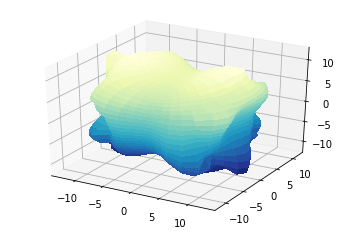

In [52]:
patch = HS.patches[0].patches[0]
theta, phi = np.linspace(0.0001,np.pi+0.0001, 40), np.linspace(0.0001, 2*np.pi+0.0001, 40)
R = []
for j in phi:
    theta_list = []
    for i in theta:
        t = complex(math.sin(i)*math.sin(j), math.cos(i))/(sin(i)*cos(j)) 
        if np.absolute(t) <= 1:
            eta = patch.num_eta(h_minimal, [1, -1, t, 0, -t])
        else:
            eta = patch.num_eta(h_minimal,[1, -1, 1/t, 0, -1/t])
        theta_list.append(eta)
    R.append(theta_list)
R = np.asarray(R)
THETA, PHI = np.meshgrid(theta, phi)
X = R * np.sin(THETA) * np.cos(PHI)
Y = R * np.sin(THETA) * np.sin(PHI)
Z = R * np.cos(THETA)
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
plot = ax.plot_surface(
    X, Y, Z, rstride=1, cstride=1, cmap=plt.cm.YlGnBu_r,
    linewidth=0, antialiased=False)

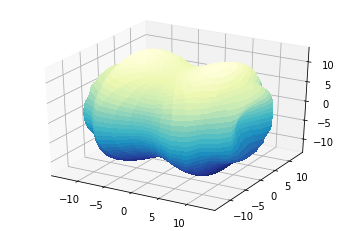

In [35]:
patch = HS.patches[0].patches[0]
theta, phi = np.linspace(0.0001,np.pi+0.0001, 40), np.linspace(0.0001, 2*np.pi+0.0001, 40)
R = []
for j in phi:
    theta_list = []
    for i in theta:
        t = complex(math.sin(i)*math.sin(j), math.cos(i))/(sin(i)*cos(j)) 
        if np.absolute(t) <= 1:
            eta = patch.num_eta('identity', [1, -1, t, 0, -t])
        else:
            eta = patch.num_eta('identity',[1, -1, 1/t, 0, -1/t])
        theta_list.append(eta)
    R.append(theta_list)
R = np.asarray(R)
THETA, PHI = np.meshgrid(theta, phi)
X = R * np.sin(THETA) * np.cos(PHI)
Y = R * np.sin(THETA) * np.sin(PHI)
Z = R * np.cos(THETA)
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
plot = ax.plot_surface(
    X, Y, Z, rstride=1, cstride=1, cmap=plt.cm.YlGnBu_r,
    linewidth=0, antialiased=False)